# import necessary library 

In [12]:
import math
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Dataset

In [2]:
dataset = pd.read_csv('default.csv')

df = pd.DataFrame(dataset)

df                                             

,Year,Average\nClosing Price,Year Open,Year High,Year Low,Year Close,Annual%Change
0,2022,$0.7311,$0.5642,$0.8820,$0.5642,$0.7012,24.15%
1,2021,$0.5775,$0.4213,$0.7208,$0.4170,$0.5648,32.61%
2,2020,$0.3127,$0.3524,$0.4259,$0.2499,$0.4259,22.70%
3,2019,$0.2932,$0.2818,$0.3534,$0.2661,$0.3471,24.90%
4,2018,$0.2993,$0.3355,$0.3390,$0.2696,$0.2779,-16.35%
...,...,...,...,...,...,...,...
57,1965,$0.1055,$0.1050,$0.1214,$0.0919,$0.1051,-3.93%
58,1964,$0.0900,$0.0827,$0.1232,$0.0756,$0.1094,31.97%
59,1963,$0.0896,$0.0863,$0.1025,$0.0765,$0.0829,-3.72%
60,1962,$0.0907,$0.1064,$0.1089,$0.0750,$0.0861,-18.85%


# Preprocessing

In [3]:
# remove unnecessary columns
df = df.drop("Annual%Change", axis="columns")

In [4]:
df = df.drop("Average\nClosing Price", axis="columns")

In [5]:
#rename columns

df.rename(columns={
    "Year Open" : "Open", 
    "Year High" : "High",
    "Year Low" : "Low",
    "Year Close": "Close"
}, inplace=True)

In [6]:
#remove dollar symbol from dataframe

cols_to_check = ["Open", "High", "Low", "Close"]

for col in cols_to_check:
    df[col] = df[col].apply(lambda x : float(x[1:]) if x.startswith("$") else float(x))
    
print(df)

    Year    Open    High     Low   Close
0   2022  0.5642  0.8820  0.5642  0.7012
1   2021  0.4213  0.7208  0.4170  0.5648
2   2020  0.3524  0.4259  0.2499  0.4259
3   2019  0.2818  0.3534  0.2661  0.3471
4   2018  0.3355  0.3390  0.2696  0.2779
..   ...     ...     ...     ...     ...
57  1965  0.1050  0.1214  0.0919  0.1051
58  1964  0.0827  0.1232  0.0756  0.1094
59  1963  0.0863  0.1025  0.0765  0.0829
60  1962  0.1064  0.1089  0.0750  0.0861
61  1961  0.0946  0.1278  0.0944  0.1061

[62 rows x 5 columns]


In [14]:
df.dtypes

Year       int64
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [15]:
# consider data of last 12 years

df = df.head(13)

df

,Year,Open,High,Low,Close
0,2022,0.5642,0.8820,0.5642,0.7012
1,2021,0.4213,0.7208,0.4170,0.5648
2,2020,0.3524,0.4259,0.2499,0.4259
3,2019,0.2818,0.3534,0.2661,0.3471
4,2018,0.3355,0.3390,0.2696,0.2779
5,2017,0.3481,0.3607,0.3101,0.3322
6,2016,0.3012,0.3793,0.2918,0.3461
7,2015,0.3209,0.3478,0.2605,0.3071
8,2014,0.3880,0.4449,0.3128,0.3211
9,2013,0.5105,0.5311,0.3882,0.3907


# Graph Plot

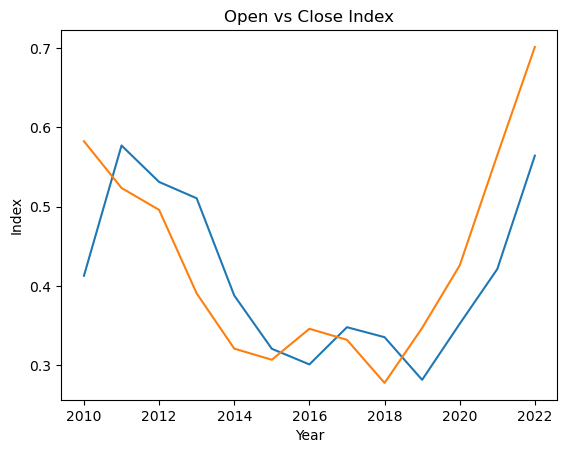

In [17]:
X_axis = df[['Year']].to_numpy()
Y_axis = df[['Open','Close']].to_numpy()

plt.plot(X_axis, Y_axis)

plt.title("Open vs Close Index")
plt.xlabel('Year')
plt.ylabel('Index')

plt.show()

In [16]:
data = df[['Open', 'High', 'Low']]
data                                                                    #df.head(13)

,Open,High,Low
0,0.5642,0.8820,0.5642
1,0.4213,0.7208,0.4170
2,0.3524,0.4259,0.2499
3,0.2818,0.3534,0.2661
4,0.3355,0.3390,0.2696
5,0.3481,0.3607,0.3101
6,0.3012,0.3793,0.2918
7,0.3209,0.3478,0.2605
8,0.3880,0.4449,0.3128
9,0.5105,0.5311,0.3882


In [10]:
X = data.to_numpy()
#X

In [11]:
y = df[["Close"]].to_numpy()
#y